In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.odr as ODR

# Calibracion (0 grados)

In [3]:
datosCal = pd.read_csv('0.txt', sep='\t')


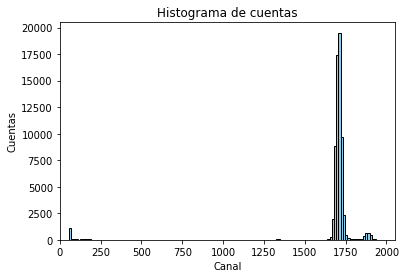

In [4]:
#Graficar histograma con el eje x el indice de celda y en el eje y cuentas
plt.figure()
plt.hist(datosCal['Cuentas'].index, weights=datosCal['Cuentas'], bins=150, edgecolor='black', color="skyblue")
plt.xlabel('Canal')
plt.ylabel('Cuentas')
plt.title('Histograma de cuentas')
plt.xlim(0, 2050)
plt.show()

In [5]:
def pathfinder(min, max, eje=500, bins=150):
    plt.hist(datosCal['Cuentas'].index, weights=datosCal['Cuentas'], bins=bins, edgecolor='black', color="skyblue")
    plt.xlabel('Canal')
    plt.ylabel('Cuentas')
    plt.xlim(min, max)
    plt.xticks(np.arange(min, max, eje))
    plt.show()

#funcion que recorta datosCal entre  el min y max
def recorte(min, max):
    #datosCal2 = datosCal[min:max]
    datosCal2 =  datosCal[(datosCal['Cuentas'].index > min) & (datosCal['Cuentas'].index < max)]
    return datosCal2

## Pico 1 (Rayleigh) (1707)

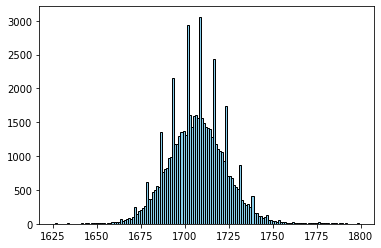

In [6]:
#pathfinder(1625, 1800, 50, 500)
pico1 = recorte(1625, 1800)
plt.hist(pico1['Cuentas'].index, weights=pico1['Cuentas'], bins=150, edgecolor='black', color="skyblue")
plt.show()

In [7]:
#Ajuto el pico1 usando ODR y la funcion gausseana
#Almacenar en variable x un array con los indices de pico1
x = pico1['Cuentas'].index
y = pico1['Cuentas']

def f(B, x):
    return B[0]*np.exp(-((x-B[1])**2)/(2*B[2]**2))

gauss = ODR.Model(f)
data = ODR.RealData(x, y)
odr = ODR.ODR(data, gauss, beta0=[1500, 1715, 20], maxit=10000)
out = odr.run()
out.pprint()

cen1 = out.beta[1]
err_cen1 = out.sd_beta[1]

Beta: [1603.87963695 1707.23429211   16.3850509 ]
Beta Std Error: [6.9797257  0.33169172 0.16080371]
Beta Covariance: [[ 3.89763053e+00  1.23400486e-02 -9.51012002e-03]
 [ 1.23400486e-02  8.80224044e-03 -1.83136340e-04]
 [-9.51012002e-03 -1.83136340e-04  2.06878851e-03]]
Residual Variance: 12.499022251943039
Inverse Condition #: 0.027287923622966264
Reason(s) for Halting:
  Sum of squares convergence


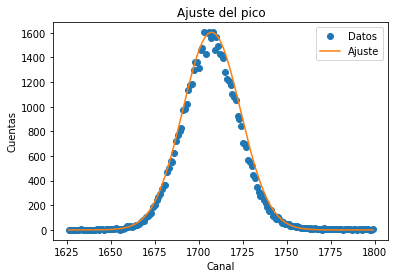

El pico está centrado en el canal 1707.2342921114632 +/- 0.33169172305577616


In [8]:
#Grafico el ajuste
plt.figure()
plt.plot(x, y, 'o', label='Datos')
plt.plot(x, f(out.beta, x), label='Ajuste')
plt.xlabel('Canal')
plt.ylabel('Cuentas')
plt.title('Ajuste del pico')
plt.legend()
plt.show()

print("El pico está centrado en el canal", cen1, "+/-", err_cen1)

## Pico 2 (1800-2000)

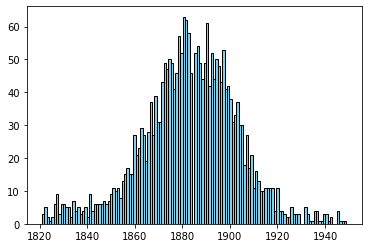

In [9]:
#pathfinder(1820, 1950, 25, 500)
pico2 = recorte(1820, 1950)
plt.hist(pico2['Cuentas'].index, weights=pico2['Cuentas'], bins=1950-1820, edgecolor='black', color="skyblue")
plt.show()

In [10]:
#Ajusto el pico2 usando ODR y la funcion gausseana
x = pico2['Cuentas'].index
y = pico2['Cuentas']

def f(B, x):
    return B[0]*np.exp(-((x-B[1])**2)/(2*B[2]**2))

gauss = ODR.Model(f)
data = ODR.RealData(x, y)
odr = ODR.ODR(data, gauss, beta0=[1500, 1880, 20], maxit=10000)
out = odr.run()
out.pprint()

cen2 = out.beta[1]
err_cen2 = out.sd_beta[1]

Beta: [  56.07379834 1883.87465526   17.17045604]
Beta Std Error: [0.96553627 0.43119776 0.35327001]
Beta Covariance: [[ 0.1017213  -0.00343244 -0.01679415]
 [-0.00343244  0.02028746  0.00085157]
 [-0.01679415  0.00085157  0.01361721]]
Residual Variance: 9.164848199829484
Inverse Condition #: 0.01328982520256485
Reason(s) for Halting:
  Sum of squares convergence


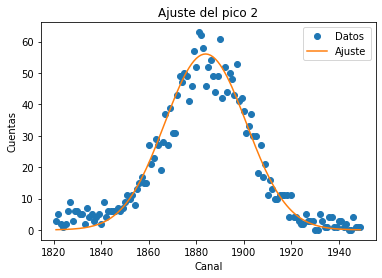

El pico está centrado en el canal 1883.8746552639147 +- 0.4311977611099703


In [11]:
#Grafico el ajuste
plt.figure()
plt.plot(x, y, 'o', label='Datos')
plt.plot(x, f(out.beta, x), label='Ajuste')
plt.xlabel('Canal')
plt.ylabel('Cuentas')
plt.title('Ajuste del pico 2')
plt.legend()
plt.show()

print("El pico está centrado en el canal", cen2, "+-", err_cen2)

## Pico 3 (0 - 250?) - Error del detector 
Supongo que es ruido ya q no tiene forma gausseana y es justo en el primer canal (no empieza en el canal 0)

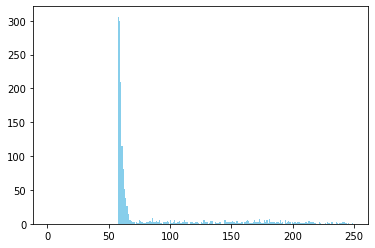

In [12]:
#pathfinder(0, 250, 50, 250)
pico3 = recorte(0, 250)
plt.hist(pico3['Cuentas'].index, weights=pico3['Cuentas'], bins=250, color="skyblue")
plt.show()

## Pico 4 (1300-1400)

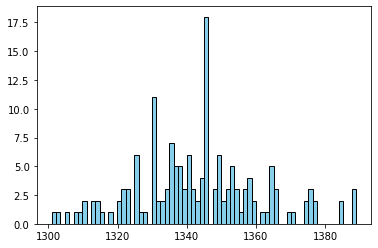

In [13]:
#pathfinder(1310, 1380, 50, 250)
pico4 = recorte(1300, 1390)
plt.hist(pico4['Cuentas'].index, weights=pico4['Cuentas'], bins=1380-1310, edgecolor='black', color="skyblue")
plt.show()


In [14]:
# Ajusto el pico 4 usando ODR y la funcion gausseana
x = pico4['Cuentas'].index
y = pico4['Cuentas']

def f(B, x):
    return B[0]*np.exp(-((x-B[1])**2)/(2*B[2]**2))

gauss = ODR.Model(f)
data = ODR.RealData(x, y)
odr = ODR.ODR(data, gauss, beta0=[18, 1342, 15], maxit=10000)
out = odr.run()
out.pprint()

cen4 = out.beta[1]
err_cen4 = out.sd_beta[1]

Beta: [   3.9025299  1341.91159444   14.9771051 ]
Beta Std Error: [0.38113221 1.69476067 1.69213348]
Beta Covariance: [[ 5.71421211e-02  5.48038847e-04 -1.46109224e-01]
 [ 5.48038847e-04  1.12985262e+00 -3.71882823e-03]
 [-1.46109224e-01 -3.71882823e-03  1.12635238e+00]]
Residual Variance: 2.5421136105752784
Inverse Condition #: 0.011383729175101009
Reason(s) for Halting:
  Sum of squares convergence


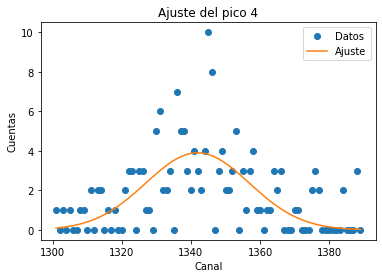

El pico está centrado en el canal 1341.9115944393425 +- 1.694760666993615


In [15]:
# Grafico el ajuste
plt.figure()
plt.plot(x, y, 'o', label='Datos')
plt.plot(x, f(out.beta, x), label='Ajuste')
plt.xlabel('Canal')
plt.ylabel('Cuentas')
plt.title('Ajuste del pico 4')
plt.legend()
plt.show()

print("El pico está centrado en el canal", cen4, "+-", err_cen4)

## Resumen:

In [16]:
print("N° Pico \t Canal \t Error")
print("1 (R) \t", cen1, "\t", err_cen1)
print("2 \t", cen2, "\t", err_cen2)
print("4 \t", cen4, "\t", err_cen4)


N° Pico 	 Canal 	 Error
1 (R) 	 1707.2342921114632 	 0.33169172305577616
2 	 1883.8746552639147 	 0.4311977611099703
4 	 1341.9115944393425 	 1.694760666993615


In [17]:
cen = np.array([cen1, cen2, cen4]) #Cobre (generador R), Kb Cobre, Ka Hierro 
err_cen = np.array([err_cen1, err_cen2, err_cen4])
energia = np.array([8041.5, 8905.29, 6397.3])
err_energia = np.array([1, 1, 7.3])

# Hacer  ajuste lineal odr teniendo en cuenta los errores de los datos
def f(B, x):
    return B[0]*x + B[1]

lineal = ODR.Model(f)
data = ODR.RealData(cen, energia, sx=err_cen, sy=err_energia)
odr = ODR.ODR(data, lineal, beta0=[1, 1], maxit=10000)
out = odr.run()
out.pprint()

print("La energia por cada canal es de: ", out.beta[0], "+/-", out.sd_beta[0], "eV")

Beta: [   4.7930316 -132.7138781]
Beta Std Error: [1.49984847e-01 2.65994334e+02]
Beta Covariance: [[ 1.94462737e-04 -3.44288810e-01]
 [-3.44288810e-01  6.11626642e+02]]
Residual Variance: 115.68002580746378
Inverse Condition #: 3.2837489820448e-05
Reason(s) for Halting:
  Sum of squares convergence
La energia por cada canal es de:  4.793031603865162 +/- 0.14998484731791809 eV


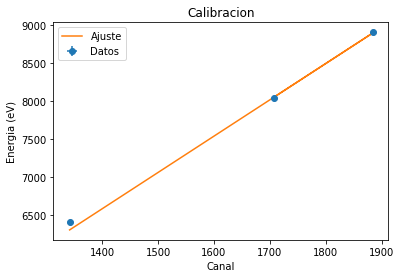

In [18]:

# Convert err_cen and err_energia to numpy arrays
err_cen = np.array(err_cen)
err_energia = np.array(err_energia)

# Graficar el ajuste
#Graficar el ajuste
plt.figure()
plt.errorbar(cen, energia, xerr=err_cen, yerr=err_energia, fmt='o', label='Datos')
plt.plot(cen, f(out.beta, cen), label='Ajuste')
plt.xlabel('Canal')
plt.ylabel('Energia (eV)')
plt.title('Calibracion')
plt.legend()
plt.show()



In [19]:
m = out.beta[0]
b = out.beta[1]
def to_energia(canal):
    return m*canal + b

In [20]:
m, b

(4.793031603865162, -132.71387809677543)

# 90°

In [21]:
def err_energia(canal):
    return np.sqrt((m*canal)**2 + b**2)

def saturnV(min, max, pasos=500, bins=150):
    plt.hist(energia, weights=cuentas, bins=bins, edgecolor='black', color="skyblue")
    plt.xlabel('Energia (eV)')
    plt.ylabel('Cuentas')
    plt.xlim(min, max)
    plt.xticks(np.arange(min, max, pasos))
    plt.show()
    
#defino una funcion para recortar los datos entre el min y el max
def recorte2(min, max):
    return datos[(datos['Energia'] > min) & (datos['Energia'] < max)]

In [22]:
datos = pd.read_csv('90.txt', sep='\t')
datos['Energia'] = to_energia(datos['Cuentas'].index)
energia = datos['Energia']
cuentas = datos['Cuentas']

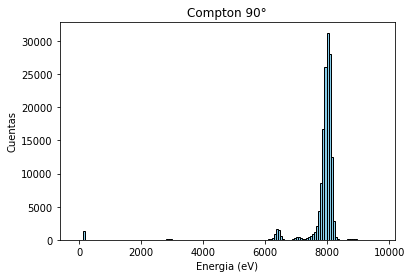

In [23]:
plt.hist(energia, weights=cuentas, bins=150, edgecolor='black', color="skyblue")
plt.xlabel('Energia (eV)')
plt.ylabel('Cuentas')
plt.title('Compton 90°')
plt.show()

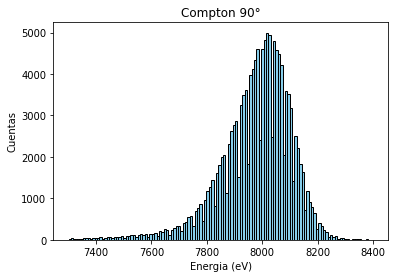

In [24]:
#saturnV(7300, 8400, 200, 8400-6000)
d90 = recorte2(7300, 8400)
plt.hist(d90['Energia'], weights=d90['Cuentas'], bins=128, edgecolor='black', color="skyblue")
plt.xlabel('Energia (eV)')
plt.ylabel('Cuentas')
plt.title('Compton 90°')
plt.show()

In [25]:
# Ajusto d90 utilizando una suma de funciones gausseanas y ODR
x = d90['Energia']
y = d90['Cuentas']

def f(B, x):
    return B[0]*np.exp(-((x-B[1])**2)/(2*B[2]**2)) + B[3]*np.exp(-((x-8041)**2)/(2*B[4]**2))

gauss = ODR.Model(f)
data = ODR.RealData(x, y)
odr = ODR.ODR(data, gauss, beta0=[100, 7500, 20, 5000, 100], maxit=10000)
out = odr.run()
out.pprint()

cen90 = out.beta[1]
err_cen90 = out.sd_beta[1]
print('Centro del pico C: ', cen90, "+/-", err_cen90)


Beta: [ 895.3923573  7918.60629063  132.57324088 1925.93292408   74.70324282]
Beta Std Error: [68.98450471 10.40951324  3.13329142 94.3154577   3.01473538]
Beta Covariance: [[ 1.33569728e+01  1.79423527e+00  3.15617692e-01 -1.72909847e+01
  -4.84890495e-01]
 [ 1.79423527e+00  3.04134568e-01  7.14841444e-02 -2.65919035e+00
  -7.16599127e-02]
 [ 3.15617692e-01  7.14841444e-02  2.75553873e-02 -5.82641777e-01
  -1.59269347e-02]
 [-1.72909847e+01 -2.65919035e+00 -5.82641777e-01  2.49672491e+01
   6.47760967e-01]
 [-4.84890495e-01 -7.16599127e-02 -1.59269347e-02  6.47760967e-01
   2.55095817e-02]]
Residual Variance: 356.28296578761643
Inverse Condition #: 0.0004253317728809823
Reason(s) for Halting:
  Sum of squares convergence
Centro del pico C:  7918.606290632429 +/- 10.409513238296832


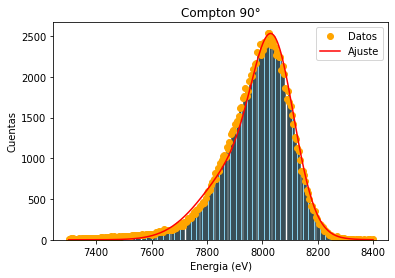

El pico C está centrado en la energia 7918.606290632429 +/- 10.409513238296832 eV


In [26]:
#Grafico el ajuste
plt.figure()
plt.plot(x, y, 'o', label='Datos', color="orange")
plt.hist(x, weights=y, bins=250, edgecolor="black", color="skyblue", linewidth=0.5)
plt.plot(x, f(out.beta, x), label='Ajuste', color="red")
plt.xlabel('Energia (eV)')
plt.ylabel('Cuentas')
plt.title('Compton 90°')
plt.legend()
plt.show()

print("El pico C está centrado en la energia", cen90, "+/-", err_cen90, "eV")

# 95°

In [27]:
datos = pd.read_csv('95.txt', sep='\t')
datos['Energia'] = to_energia(datos['Cuentas'].index)
energia = datos['Energia']
cuentas = datos['Cuentas']

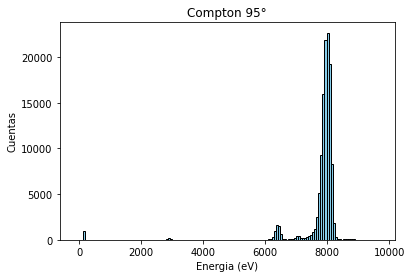

In [28]:
plt.hist(energia, weights=cuentas, bins=150, edgecolor='black', color="skyblue")
plt.xlabel('Energia (eV)')
plt.ylabel('Cuentas')
plt.title('Compton 95°')
plt.show()

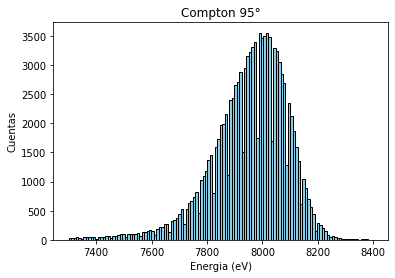

In [29]:
#saturnV(7300, 8400, 200, 8400-6000)
d95 = recorte2(7300, 8400)
plt.hist(d95['Energia'], weights=d95['Cuentas'], bins=125, edgecolor='black', color="skyblue")
plt.xlabel('Energia (eV)')
plt.ylabel('Cuentas')
plt.title('Compton 95°')
plt.show()

In [30]:
x = d95['Energia']
y = d95['Cuentas']

def f(B, x):
    return B[0]*np.exp(-((x-B[1])**2)/(2*B[2]**2)) + B[3]*np.exp(-((x-8041)**2)/(2*B[4]**2))

gauss = ODR.Model(f)
data = ODR.RealData(x, y)
odr = ODR.ODR(data, gauss, beta0=[100, 7500, 20, 5000, 100], maxit=10000)
out = odr.run()
out.pprint()

cen95 = out.beta[1]
err_cen95 = out.sd_beta[1]
print('Centro del pico C: ', cen95, "+/-", err_cen95)

Beta: [1024.44263611 7913.92598942  129.77552981 1094.50244436   73.88052704]
Beta Std Error: [61.62581036  9.47963574  3.02778528 93.23100468  4.2699737 ]
Beta Covariance: [[ 10.31464505   1.43887272   0.33489186 -14.83073359  -0.62507164]
 [  1.43887272   0.24406882   0.06554225  -2.32926928  -0.09266455]
 [  0.33489186   0.06554225   0.02489884  -0.61037954  -0.02428137]
 [-14.83073359  -2.32926928  -0.61037954  23.6074854    0.89181978]
 [ -0.62507164  -0.09266455  -0.02428137   0.89181978   0.04951986]]
Residual Variance: 368.18916057405426
Inverse Condition #: 0.000378194351298603
Reason(s) for Halting:
  Sum of squares convergence
Centro del pico C:  7913.925989422033 +/- 9.47963573720774


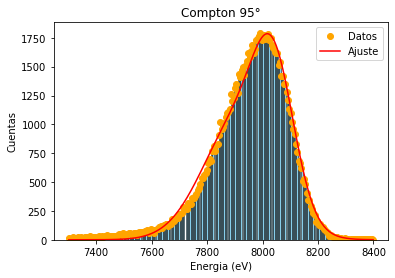

El pico C está centrado en la energia 7913.925989422033 +/- 9.47963573720774 eV


In [31]:
#Grafico el ajuste
plt.figure()
plt.plot(x, y, 'o', label='Datos', color="orange")
plt.hist(x, weights=y, bins=250, edgecolor="black", color="skyblue", linewidth=0.5)
plt.plot(x, f(out.beta, x), label='Ajuste', color="red")
plt.xlabel('Energia (eV)')
plt.ylabel('Cuentas')
plt.title('Compton 95°')
plt.legend()
plt.show()

print("El pico C está centrado en la energia", cen95, "+/-", err_cen95, "eV")

# 100°

In [32]:
datos = pd.read_csv('100.txt', sep='\t')
datos['Energia'] = to_energia(datos['Cuentas'].index)
energia = datos['Energia']
cuentas = datos['Cuentas']

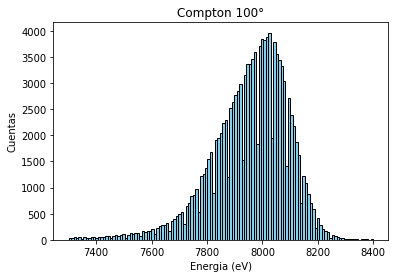

In [33]:
d100 = recorte2(7300, 8400)
plt.hist(d100['Energia'], weights=d100['Cuentas'], bins=125, edgecolor='black', color="skyblue")
plt.xlabel('Energia (eV)')
plt.ylabel('Cuentas')
plt.title('Compton 100°')
plt.show()

In [34]:
x = d100['Energia']
y = d100['Cuentas']

def f(B, x):
    return B[0]*np.exp(-((x-B[1])**2)/(2*B[2]**2)) + B[3]*np.exp(-((x-8041)**2)/(2*B[4]**2))

gauss = ODR.Model(f)
data = ODR.RealData(x, y)
odr = ODR.ODR(data, gauss, beta0=[100, 7500, 20, 5000, 100], maxit=10000)
out = odr.run()
out.pprint()

cen100 = out.beta[1]
err_cen100 = out.sd_beta[1]
print('Centro del pico C: ', cen100, "+/-", err_cen100)

Beta: [1055.27337685 7909.68563443  135.41038339 1270.07881482   73.97887996]
Beta Std Error: [52.06620904  7.73587918  2.474816   75.57032807  3.51167694]
Beta Covariance: [[ 7.93396425e+00  1.03787005e+00  2.05316822e-01 -1.07127739e+01
  -4.58300552e-01]
 [ 1.03787005e+00  1.75144974e-01  4.34635568e-02 -1.64035122e+00
  -6.44417194e-02]
 [ 2.05316822e-01  4.34635568e-02  1.79252059e-02 -3.95650551e-01
  -1.51088300e-02]
 [-1.07127739e+01 -1.64035122e+00 -3.95650551e-01  1.67140208e+01
   6.17218112e-01]
 [-4.58300552e-01 -6.44417194e-02 -1.51088300e-02  6.17218112e-01
   3.60917080e-02]]
Residual Variance: 341.68166616401874
Inverse Condition #: 0.00047104736168471716
Reason(s) for Halting:
  Sum of squares convergence
Centro del pico C:  7909.685634427816 +/- 7.735879175772334


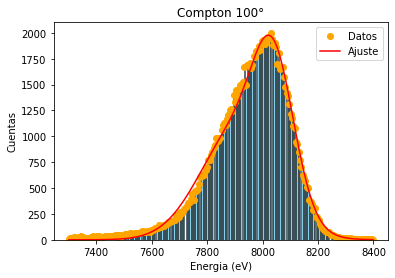

El pico C está centrado en la energia 7909.685634427816 +/- 7.735879175772334 eV


In [35]:
#Grafico el ajuste
plt.figure()
plt.plot(x, y, 'o', label='Datos', color="orange")
plt.hist(x, weights=y, bins=250, edgecolor="black", color="skyblue", linewidth=0.5)
plt.plot(x, f(out.beta, x), label='Ajuste', color="red")
plt.xlabel('Energia (eV)')
plt.ylabel('Cuentas')
plt.title('Compton 100°')
plt.legend()
plt.show()

print("El pico C está centrado en la energia", cen100, "+/-", err_cen100, "eV")

# 105°

In [36]:
datos = pd.read_csv('105.txt', sep='\t')
datos['Energia'] = to_energia(datos['Cuentas'].index)
energia = datos['Energia']
cuentas = datos['Cuentas']

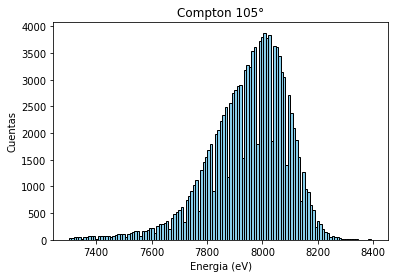

In [37]:
d105 = recorte2(7300, 8400)
plt.hist(d105['Energia'], weights=d105['Cuentas'], bins=125, edgecolor='black', color="skyblue")
plt.xlabel('Energia (eV)')
plt.ylabel('Cuentas')
plt.title('Compton 105°')
plt.show()

In [38]:
x = d105['Energia']
y = d105['Cuentas']

def f(B, x):
    return B[0]*np.exp(-((x-B[1])**2)/(2*B[2]**2)) + B[3]*np.exp(-((x-8041)**2)/(2*B[4]**2))

gauss = ODR.Model(f)
data = ODR.RealData(x, y)
odr = ODR.ODR(data, gauss, beta0=[100, 7500, 20, 5000, 100], maxit=10000)
out = odr.run()
out.pprint()

cen105 = out.beta[1]
err_cen105 = out.sd_beta[1]
print('Centro del pico C: ', cen105, "+/-", err_cen105)

Beta: [1101.87648652 7902.64589955  136.34028265 1238.47771306   73.14006474]
Beta Std Error: [50.09892966  7.90318935  2.66769636 76.95518693  3.68652286]
Beta Covariance: [[ 6.51363745  0.8962818   0.19856671 -9.20801383 -0.4141766 ]
 [ 0.8962818   0.16209569  0.04383844 -1.52029472 -0.06128618]
 [ 0.19856671  0.04383844  0.01846883 -0.40785619 -0.01557107]
 [-9.20801383 -1.52029472 -0.40785619 15.36888929  0.58589534]
 [-0.4141766  -0.06128618 -0.01557107  0.58589534  0.0352696 ]]
Residual Variance: 385.3304350687569
Inverse Condition #: 0.00047043742852522364
Reason(s) for Halting:
  Sum of squares convergence
Centro del pico C:  7902.645899554292 +/- 7.903189351457047


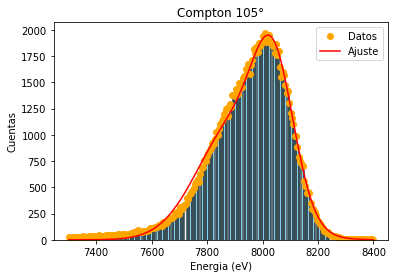

El pico C está centrado en la energia 7902.645899554292 +/- 7.903189351457047 eV


In [39]:
# Grafico el ajuste
plt.figure()
plt.plot(x, y, 'o', label='Datos', color="orange")
plt.hist(x, weights=y, bins=250, edgecolor="black", color="skyblue", linewidth=0.5)
plt.plot(x, f(out.beta, x), label='Ajuste', color="red")
plt.xlabel('Energia (eV)')
plt.ylabel('Cuentas')
plt.title('Compton 105°')
plt.legend()
plt.show()

print("El pico C está centrado en la energia", cen105, "+/-", err_cen105, "eV")

# 110°

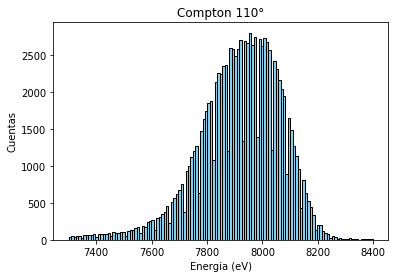

In [40]:
datos = pd.read_csv('110.txt', sep='\t')
datos['Energia'] = to_energia(datos['Cuentas'].index)
energia = datos['Energia']
cuentas = datos['Cuentas']

d110 = recorte2(7300, 8400)
plt.hist(d110['Energia'], weights=d110['Cuentas'], bins=125, edgecolor='black', color="skyblue")
plt.xlabel('Energia (eV)')
plt.ylabel('Cuentas')
plt.title('Compton 110°')
plt.show()

In [41]:
x = d110['Energia']
y = d110['Cuentas']

def f(B, x):
    return B[0]*np.exp(-((x-B[1])**2)/(2*B[2]**2)) + B[3]*np.exp(-((x-8041)**2)/(2*B[4]**2))

gauss = ODR.Model(f)
data = ODR.RealData(x, y)
odr = ODR.ODR(data, gauss, beta0=[100, 7500, 20, 5000, 100], maxit=10000)
out = odr.run()
out.pprint()

cen110 = out.beta[1]
err_cen110 = out.sd_beta[1]
print('Centro del pico C: ', cen110, "+/-", err_cen110)

Beta: [1178.67420349 7894.17797573  136.45428838  659.3538726    63.65257305]
Beta Std Error: [29.00282681  5.81124907  2.34517866 52.87285592  4.73336898]
Beta Covariance: [[ 1.41292014  0.21245799  0.04511046 -1.71175176 -0.20440983]
 [ 0.21245799  0.05672519  0.01570055 -0.43274035 -0.03492234]
 [ 0.04511046  0.01570055  0.00923823 -0.13746701 -0.00830021]
 [-1.71175176 -0.43274035 -0.13746701  4.69572327  0.2047988 ]
 [-0.20440983 -0.03492234 -0.00830021  0.2047988   0.03763377]]
Residual Variance: 595.3372312670627
Inverse Condition #: 0.0008393859967917356
Reason(s) for Halting:
  Sum of squares convergence
Centro del pico C:  7894.177975734752 +/- 5.811249070446935


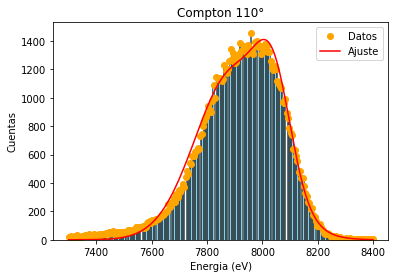

El pico C está centrado en la energia 7894.177975734752 +/- 5.811249070446935 eV


In [42]:
# Grafico el ajuste
plt.figure()
plt.plot(x, y, 'o', label='Datos', color="orange")
plt.hist(x, weights=y, bins=250, edgecolor="black", color="skyblue", linewidth=0.5)
plt.plot(x, f(out.beta, x), label='Ajuste', color="red")
plt.xlabel('Energia (eV)')
plt.ylabel('Cuentas')
plt.title('Compton 110°')
plt.legend()
plt.show()

print("El pico C está centrado en la energia", cen110, "+/-", err_cen110, "eV")

# 115°

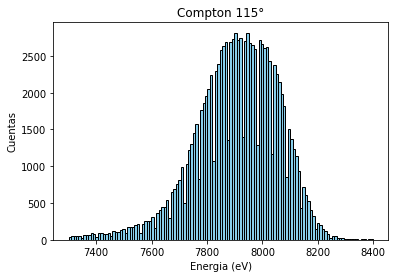

In [43]:
datos = pd.read_csv('115.txt', sep='\t')
datos['Energia'] = to_energia(datos['Cuentas'].index)
energia = datos['Energia']
cuentas = datos['Cuentas']

d115 = recorte2(7300, 8400)
plt.hist(d115['Energia'], weights=d115['Cuentas'], bins=125, edgecolor='black', color="skyblue")
plt.xlabel('Energia (eV)')
plt.ylabel('Cuentas')
plt.title('Compton 115°')
plt.show()

In [44]:
x = d115['Energia']
y = d115['Cuentas']

def f(B, x):
    return B[0]*np.exp(-((x-B[1])**2)/(2*B[2]**2)) + B[3]*np.exp(-((x-8041)**2)/(2*B[4]**2))

gauss = ODR.Model(f)
data = ODR.RealData(x, y)
odr = ODR.ODR(data, gauss, beta0=[100, 7800, 20, 2500, 100], maxit=10000)
out = odr.run()
out.pprint()

cen115 = out.beta[1]
err_cen115 = out.sd_beta[1]
print('Centro del pico C: ', cen115, "+/-", err_cen115)

Beta: [1306.83029678 7889.48355623  139.53576218  403.73818091   74.63320624]
Beta Std Error: [35.40371325  6.78015887  2.56330183 67.94982995  8.53321844]
Beta Covariance: [[ 2.78690777  0.47231029  0.14698622 -4.72944926 -0.64521296]
 [ 0.47231029  0.10221266  0.03269333 -0.98095259 -0.11046911]
 [ 0.14698622  0.03269333  0.01460913 -0.33201635 -0.034322  ]
 [-4.72944926 -0.98095259 -0.33201635 10.26601077  1.03673946]
 [-0.64521296 -0.11046911 -0.034322    1.03673946  0.16190143]]
Residual Variance: 449.75399841686095
Inverse Condition #: 0.00040470968306096766
Reason(s) for Halting:
  Sum of squares convergence
Centro del pico C:  7889.48355623476 +/- 6.780158870946737


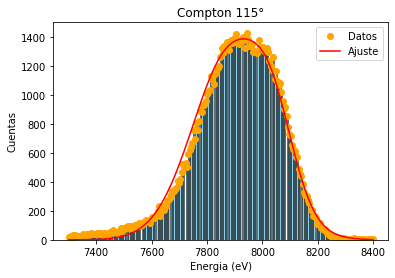

El pico C está centrado en la energia 7889.48355623476 +/- 6.780158870946737 eV


In [45]:
#Grafico el ajuste
plt.figure()
plt.plot(x, y, 'o', label='Datos', color="orange")
plt.hist(x, weights=y, bins=250, edgecolor="black", color="skyblue", linewidth=0.5)
plt.plot(x, f(out.beta, x), label='Ajuste', color="red")
plt.xlabel('Energia (eV)')
plt.ylabel('Cuentas')
plt.title('Compton 115°')
plt.legend()
plt.show()

print("El pico C está centrado en la energia", cen115, "+/-", err_cen115, "eV")

# 120°

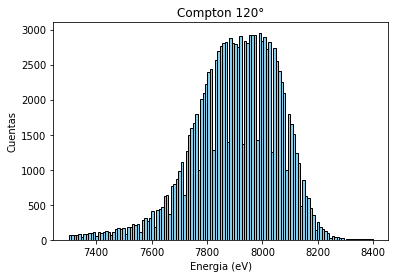

In [46]:
datos = pd.read_csv('120.txt', sep='\t')
datos['Energia'] = to_energia(datos['Cuentas'].index)
energia = datos['Energia']
cuentas = datos['Cuentas']

d120 = recorte2(7300, 8400)
plt.hist(d120['Energia'], weights=d120['Cuentas'], bins=125, edgecolor='black', color="skyblue")
plt.xlabel('Energia (eV)')
plt.ylabel('Cuentas')
plt.title('Compton 120°')
plt.show()

In [47]:
x = d120['Energia']
y = d120['Cuentas']

data = ODR.RealData(x, y)
odr = ODR.ODR(data, gauss, beta0=[1300, 7850, 130, 500, 100], maxit=10000)
out = odr.run()
out.pprint()

cen120 = out.beta[1]
err_cen120 = out.sd_beta[1]
print('Centro del pico C: ', cen120, "+/-", err_cen120)

Beta: [1332.5209695  7877.94287767  143.3873977   628.4789517    72.17670458]
Beta Std Error: [28.98255482  6.6920521   2.75793623 62.12939211  5.61287665]
Beta Covariance: [[ 1.46558567  0.27754816  0.08784101 -2.52641138 -0.26932028]
 [ 0.27754816  0.07813696  0.02643241 -0.69094366 -0.05474578]
 [ 0.08784101  0.02643241  0.01327108 -0.2558685  -0.01755979]
 [-2.52641138 -0.69094366 -0.2558685   6.7349145   0.46080768]
 [-0.26932028 -0.05474578 -0.01755979  0.46080768  0.05496787]]
Residual Variance: 573.1418514303966
Inverse Condition #: 0.0011603083437501018
Reason(s) for Halting:
  Sum of squares convergence
Centro del pico C:  7877.942877674302 +/- 6.692052095177211


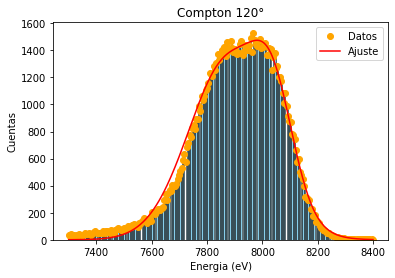

El pico C está centrado en la energia 7877.942877674302 +/- 6.692052095177211 eV


In [48]:
# Grafico el ajuste
plt.figure()
plt.plot(x, y, 'o', label='Datos', color="orange")
plt.hist(x, weights=y, bins=250, edgecolor="black", color="skyblue", linewidth=0.5)
plt.plot(x, f(out.beta, x), label='Ajuste', color="red")
plt.xlabel('Energia (eV)')
plt.ylabel('Cuentas')
plt.title('Compton 120°')
plt.legend()
plt.show()

print("El pico C está centrado en la energia", cen120, "+/-", err_cen120, "eV")


# 125°

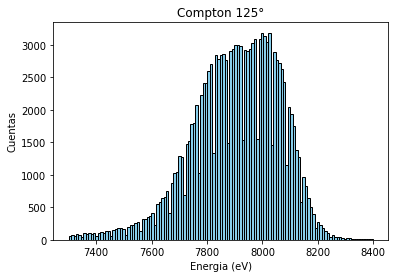

In [49]:
datos = pd.read_csv('125.txt', sep='\t')
datos['Energia'] = to_energia(datos['Cuentas'].index)
energia = datos['Energia']
cuentas = datos['Cuentas']

d125 = recorte2(7300, 8400)
plt.hist(d125['Energia'], weights=d125['Cuentas'], bins=125, edgecolor='black', color="skyblue")
plt.xlabel('Energia (eV)')
plt.ylabel('Cuentas')
plt.title('Compton 125°')
plt.show()

In [50]:
x = d125['Energia']
y = d125['Cuentas']

data = ODR.RealData(x, y)
odr = ODR.ODR(data, gauss, beta0=[1300, 7800, 130, 500, 100], maxit=10000)
out = odr.run()
out.pprint()

cen125 = out.beta[1]
err_cen125 = out.sd_beta[1]
print('Centro del pico C: ', cen125, "+/-", err_cen125)

Beta: [1410.18620165 7874.23644207  148.1125303   751.29526321   64.18442314]
Beta Std Error: [16.14263275  4.25568743  1.95246205 39.59500659  3.19789076]
Beta Covariance: [[ 0.48693055  0.08102333  0.01929325 -0.67470139 -0.08503625]
 [ 0.08102333  0.03384213  0.010267   -0.27177307 -0.01918882]
 [ 0.01929325  0.010267    0.00712334 -0.10492319 -0.00525088]
 [-0.67470139 -0.27177307 -0.10492319  2.92953796  0.13303774]
 [-0.08503625 -0.01918882 -0.00525088  0.13303774  0.01910933]]
Residual Variance: 535.1576154632006
Inverse Condition #: 0.002296901495526171
Reason(s) for Halting:
  Sum of squares convergence
Centro del pico C:  7874.236442067923 +/- 4.255687433274201


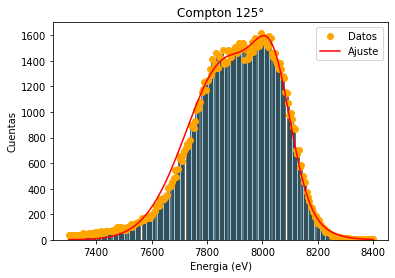

El pico C está centrado en la energia 7874.236442067923 +/- 4.255687433274201 eV


In [51]:
# Grafico el ajuste
plt.figure()
plt.plot(x, y, 'o', label='Datos', color="orange")
plt.hist(x, weights=y, bins=250, edgecolor="black", color="skyblue", linewidth=0.5)
plt.plot(x, f(out.beta, x), label='Ajuste', color="red")
plt.xlabel('Energia (eV)')
plt.ylabel('Cuentas')
plt.title('Compton 125°')
plt.legend()
plt.show()

print("El pico C está centrado en la energia", cen125, "+/-", err_cen125, "eV")


# 130°

In [52]:
datos = pd.read_csv('130.txt', sep='\t')
datos['Energia'] = to_energia(datos['Cuentas'].index)
energia = datos['Energia']
cuentas = datos['Cuentas']

d130 = recorte2(7300, 8400)


In [53]:
x = d130['Energia']
y = d130['Cuentas']

data = ODR.RealData(x, y)
odr = ODR.ODR(data, gauss, beta0=[1300, 7850, 130, 500, 100], maxit=10000)
out = odr.run()
out.pprint()

cen130 = out.beta[1]
err_cen130 = out.sd_beta[1]
print('Centro del pico C: ', cen130, "+/-", err_cen130)

Beta: [1513.18153318 7868.31870414  152.74908675 1073.03686338   64.08320352]
Beta Std Error: [15.48525556  3.9790972   1.84891832 39.80299712  2.74993317]
Beta Covariance: [[ 0.47508468  0.0734094   0.01697048 -0.61191435 -0.07180506]
 [ 0.0734094   0.03136919  0.0095573  -0.25720091 -0.01512986]
 [ 0.01697048  0.0095573   0.00677282 -0.10119304 -0.00419283]
 [-0.61191435 -0.25720091 -0.10119304  3.13881571  0.10111807]
 [-0.07180506 -0.01512986 -0.00419283  0.10111807  0.0149823 ]]
Residual Variance: 504.73768570421277
Inverse Condition #: 0.002843589457607729
Reason(s) for Halting:
  Sum of squares convergence
Centro del pico C:  7868.318704138685 +/- 3.9790971977724623


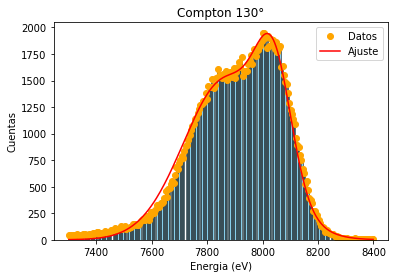

El pico C está centrado en la energia 7868.318704138685 +/- 3.9790971977724623 eV


In [54]:
# Grafico el ajuste
plt.figure()
plt.plot(x, y, 'o', label='Datos', color="orange")
plt.hist(x, weights=y, bins=250, edgecolor="black", color="skyblue", linewidth=0.5)
plt.plot(x, f(out.beta, x), label='Ajuste', color="red")
plt.xlabel('Energia (eV)')
plt.ylabel('Cuentas')
plt.title('Compton 130°')
plt.legend()
plt.show()

print("El pico C está centrado en la energia", cen130, "+/-", err_cen130, "eV")


# 135°

In [55]:
datos = pd.read_csv('135.txt', sep='\t')
datos['Energia'] = to_energia(datos['Cuentas'].index)
energia = datos['Energia']
cuentas = datos['Cuentas']

d135 = recorte2(7300, 8400)


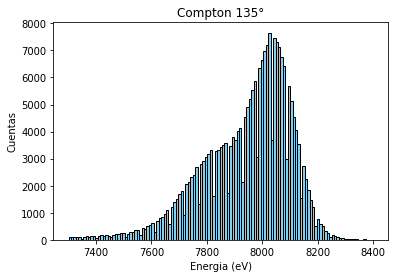

In [56]:
plt.hist(d135['Energia'], weights=d135['Cuentas'], bins=125, edgecolor='black', color="skyblue")
plt.xlabel('Energia (eV)')
plt.ylabel('Cuentas')
plt.title('Compton 135°')
plt.show()

In [57]:
x = d135['Energia']
y = d135['Cuentas']

data = ODR.RealData(x, y)
odr = ODR.ODR(data, gauss, beta0=[1700, 7860, 150, 1000, 100], maxit=10000)
out = odr.run()
out.pprint()

cen135 = out.beta[1]
err_cen135 = out.sd_beta[1]
print('Centro del pico C: ', cen135, "+/-", err_cen135)

Beta: [1640.32559125 7867.96247223  157.14665772 2897.24725021   65.70459236]
Beta Std Error: [27.85105044  4.61537146  1.96652775 52.91066785  2.31064233]
Beta Covariance: [[ 1.46164976e+00  1.60997685e-01  2.60682826e-02 -1.90363798e+00
  -8.90623826e-02]
 [ 1.60997685e-01  4.01396405e-02  1.11324090e-02 -4.04896953e-01
  -1.19462416e-02]
 [ 2.60682826e-02  1.11324090e-02  7.28719375e-03 -1.30006204e-01
  -2.82821196e-03]
 [-1.90363798e+00 -4.04896953e-01 -1.30006204e-01  5.27529372e+00
   1.24674378e-01]
 [-8.90623826e-02 -1.19462416e-02 -2.82821196e-03  1.24674378e-01
   1.00606400e-02]]
Residual Variance: 530.6887014063535
Inverse Condition #: 0.004654901057981322
Reason(s) for Halting:
  Sum of squares convergence
Centro del pico C:  7867.962472230103 +/- 4.6153714555391225


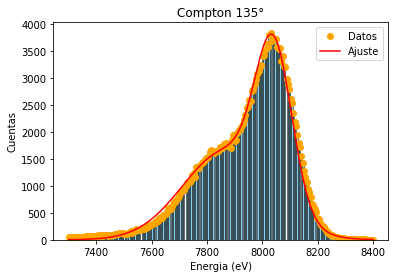

El pico C está centrado en la energia 7867.962472230103 +/- 4.6153714555391225 eV


In [58]:
# Grafico el ajuste
plt.figure()
plt.plot(x, y, 'o', label='Datos', color="orange")
plt.hist(x, weights=y, bins=250, edgecolor="black", color="skyblue", linewidth=0.5)
plt.plot(x, f(out.beta, x), label='Ajuste', color="red")
plt.xlabel('Energia (eV)')
plt.ylabel('Cuentas')
plt.title('Compton 135°')
plt.legend()
plt.show()

print("El pico C está centrado en la energia", cen135, "+/-", err_cen135, "eV")

# 140°

In [59]:
datos = pd.read_csv('140.txt', sep='\t')
datos['Energia'] = to_energia(datos['Cuentas'].index)
energia = datos['Energia']
cuentas = datos['Cuentas']

d140 = recorte2(7300, 8400)

In [60]:
x = d140['Energia']
y = d140['Cuentas']

data = ODR.RealData(x, y)
odr = ODR.ODR(data, gauss, beta0=[1700, 7860, 150, 1000, 100], maxit=10000)
out = odr.run()
out.pprint()

cen140 = out.beta[1]
err_cen140 = out.sd_beta[1]
print('Centro del pico C: ', cen140, "+/-", err_cen140)

Beta: [1753.6058583  7859.13349239  157.55618211 1981.17711126   64.9832644 ]
Beta Std Error: [18.55490705  4.09723654  1.89068555 47.98714265  2.45009021]
Beta Covariance: [[ 6.59456025e-01  8.67925361e-02  2.01568468e-02 -9.16143949e-01
  -7.13110102e-02]
 [ 8.67925361e-02  3.21551359e-02  1.01352823e-02 -3.12872509e-01
  -1.24257798e-02]
 [ 2.01568468e-02  1.01352823e-02  6.84710337e-03 -1.22516738e-01
  -3.57354725e-03]
 [-9.16143949e-01 -3.12872509e-01 -1.22516738e-01  4.41080702e+00
   1.11641464e-01]
 [-7.13110102e-02 -1.24257798e-02 -3.57354725e-03  1.11641464e-01
   1.14982679e-02]]
Residual Variance: 522.0735913377023
Inverse Condition #: 0.004928425621511862
Reason(s) for Halting:
  Sum of squares convergence
Centro del pico C:  7859.133492394038 +/- 4.0972365420876615


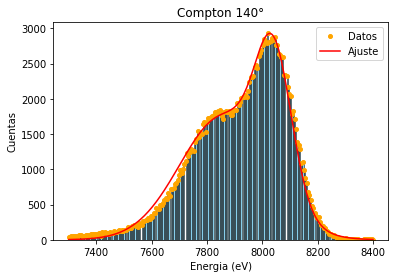

El pico C está centrado en la energia 7859.133492394038 +/- 4.0972365420876615 eV


In [61]:
# Grafico el ajuste
plt.figure()
plt.plot(x, y, 'o', label='Datos', color="orange", markersize=4)
plt.hist(x, weights=y, bins=250, edgecolor="black", color="skyblue", linewidth=0.5)
plt.plot(x, f(out.beta, x), label='Ajuste', color="red")
plt.xlabel('Energia (eV)')
plt.ylabel('Cuentas')
plt.title('Compton 140°')
plt.legend()
plt.show()

print("El pico C está centrado en la energia", cen140, "+/-", err_cen140, "eV")

# 145°

In [62]:
datos = pd.read_csv('145.txt', sep='\t')
datos['Energia'] = to_energia(datos['Cuentas'].index)   
energia = datos['Energia']
cuentas = datos['Cuentas']

d145 = recorte2(7300, 8400)

In [63]:
x = d145['Energia']
y = d145['Cuentas']

data = ODR.RealData(x, y)
odr = ODR.ODR(data, gauss, beta0=[1700, 7860, 150, 1000, 100], maxit=10000)
out = odr.run()
out.pprint()

cen145 = out.beta[1]
err_cen145 = out.sd_beta[1]
print('Centro del pico C: ', cen145, "+/-", err_cen145)

Beta: [1806.65948435 7845.34597493  155.38074607 1152.20360776   53.57823157]
Beta Std Error: [ 9.60679916  3.26910656  1.86148801 51.64259721  2.32319824]
Beta Covariance: [[ 1.40080273e-01  6.47351841e-03 -9.63790283e-04  3.58183677e-03
  -1.44803007e-02]
 [ 6.47351841e-03  1.62210033e-02  5.42112372e-03 -1.08246151e-01
  -8.95652973e-03]
 [-9.63790283e-04  5.42112372e-03  5.25944655e-03 -6.18598754e-02
  -3.46053860e-03]
 [ 3.58183677e-03 -1.08246151e-01 -6.18598754e-02  4.04795531e+00
   1.17369839e-02]
 [-1.44803007e-02 -8.95652973e-03 -3.46053860e-03  1.17369839e-02
   8.19204061e-03]]
Residual Variance: 658.8407343474703
Inverse Condition #: 0.004500982498079019
Reason(s) for Halting:
  Sum of squares convergence
Centro del pico C:  7845.34597492654 +/- 3.2691065591992423


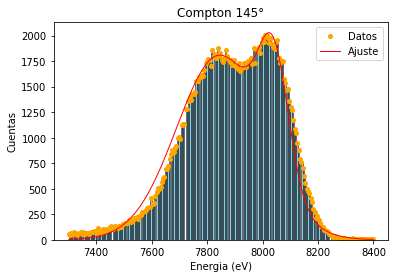

El pico C está centrado en la energia 7845.34597492654 +/- 3.2691065591992423 eV


In [64]:
# Grafico el ajuste
plt.figure()
plt.plot(x, y, 'o', label='Datos', color="orange", markersize=4)
plt.hist(x, weights=y, bins=250, edgecolor="black", color="skyblue", linewidth=0.5)
plt.plot(x, f(out.beta, x), label='Ajuste', color="red", linewidth=1)
plt.xlabel('Energia (eV)')
plt.ylabel('Cuentas')
plt.title('Compton 145°')
plt.legend()
plt.show()

print("El pico C está centrado en la energia", cen145, "+/-", err_cen145, "eV")

# 150°

In [65]:
datos = pd.read_csv('150.txt', sep='\t')
datos['Energia'] = to_energia(datos['Cuentas'].index)
energia = datos['Energia']
cuentas = datos['Cuentas']

d150 = recorte2(7300, 8400)


In [66]:
x = d150['Energia']
y = d150['Cuentas']

data = ODR.RealData(x, y)
odr = ODR.ODR(data, gauss, beta0=[1700, 7860, 150, 1000, 100], maxit=10000)
out = odr.run()
out.pprint()

cen150 = out.beta[1]
err_cen150 = out.sd_beta[1]
print('Centro del pico C: ', cen150, "+/-", err_cen150)

Beta: [1863.03161508 7842.53555682  159.40474701 1966.53267809   59.81175116]
Beta Std Error: [ 9.33288785  3.60913415  1.95173639 56.8298879   2.05463136]
Beta Covariance: [[ 1.43179029e-01  1.72593993e-02  4.26927644e-03 -9.80993603e-02
  -2.08343852e-02]
 [ 1.72593993e-02  2.14118095e-02  7.78073718e-03 -1.77784655e-01
  -9.23287153e-03]
 [ 4.26927644e-03  7.78073718e-03  6.26166225e-03 -9.26407995e-02
  -3.49201880e-03]
 [-9.80993603e-02 -1.77784655e-01 -9.26407995e-02  5.30885567e+00
   4.73515083e-02]
 [-2.08343852e-02 -9.23287153e-03 -3.49201880e-03  4.73515083e-02
   6.93929172e-03]]
Residual Variance: 608.3488346825858
Inverse Condition #: 0.0043351309397151585
Reason(s) for Halting:
  Sum of squares convergence
Centro del pico C:  7842.535556816096 +/- 3.609134152131048


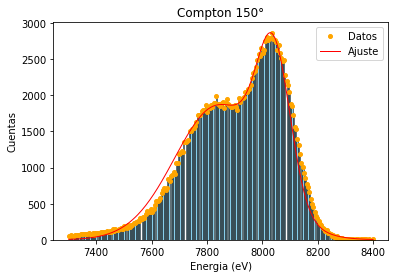

El pico C está centrado en la energia 7842.535556816096 +/- 3.609134152131048 eV


In [67]:
#Gradficoe  ajuste
plt.figure()
plt.plot(x, y, 'o', label='Datos', color="orange", markersize=4)
plt.hist(x, weights=y, bins=250, edgecolor="black", color="skyblue", linewidth=0.5)
plt.plot(x, f(out.beta, x), label='Ajuste', color="red", linewidth=1)
plt.xlabel('Energia (eV)')
plt.ylabel('Cuentas')
plt.title('Compton 150°')
plt.legend()
plt.show() 

print("El pico C está centrado en la energia", cen150, "+/-", err_cen150, "eV")

# 155°

In [68]:
datos = pd.read_csv('155.txt', sep='\t')
datos['Energia'] = to_energia(datos['Cuentas'].index)
energia = datos['Energia']
cuentas = datos['Cuentas']

d155 = recorte2(7300, 8400)

In [69]:
x = d155['Energia']
y = d155['Cuentas']

data = ODR.RealData(x, y)
odr = ODR.ODR(data, gauss, beta0=[1700, 7860, 150, 1000, 100], maxit=10000)
out = odr.run()
out.pprint()

cen155 = out.beta[1]
err_cen155 = out.sd_beta[1]
print('Centro del pico C: ', cen155, "+/-", err_cen155)

Beta: [1972.62796901 7832.76962244  158.14714397 1227.31801513   50.50546575]
Beta Std Error: [ 9.14188228  2.96018531  1.72406473 57.64787854  2.21761564]
Beta Covariance: [[ 1.29555526e-01  3.90658723e-03 -1.89968298e-03  1.71137567e-03
  -9.26796187e-03]
 [ 3.90658723e-03  1.35838380e-02  4.32519474e-03 -9.02266478e-02
  -7.76234988e-03]
 [-1.89968298e-03  4.32519474e-03  4.60778098e-03 -5.31624101e-02
  -3.19872691e-03]
 [ 1.71137567e-03 -9.02266478e-02 -5.31624101e-02  5.15170936e+00
  -5.54547616e-03]
 [-9.26796187e-03 -7.76234988e-03 -3.19872691e-03 -5.54547616e-03
   7.62354989e-03]]
Residual Variance: 645.0825679537983
Inverse Condition #: 0.004359086520714852
Reason(s) for Halting:
  Sum of squares convergence
Centro del pico C:  7832.7696224377005 +/- 2.960185309926237


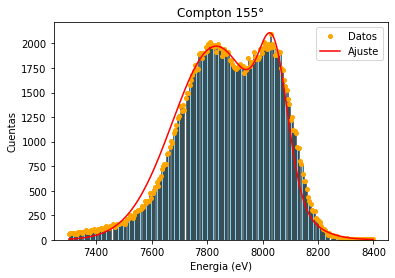

El pico C está centrado en la energia 7832.7696224377005 +/- 2.960185309926237 eV


In [70]:
# Grafico el ajuste
plt.figure()
plt.plot(x, y, 'o', label='Datos', color="orange", markersize=4)
plt.hist(x, weights=y, bins=250, edgecolor="black", color="skyblue", linewidth=0.5)
plt.plot(x, f(out.beta, x), label='Ajuste', color="red")
plt.xlabel('Energia (eV)')
plt.ylabel('Cuentas')
plt.title('Compton 155°')
plt.legend()
plt.show()

print("El pico C está centrado en la energia", cen155, "+/-", err_cen155, "eV")

# Resumen

In [71]:
print("Energia del pico Rayleigh: ", 8041.5, "eV")
print("Energia de los picos Compton:")
print("Angulo \t Energia (eV) \t\t Error")
print("90 \t", cen90, "\t", err_cen90)
print("95 \t", cen95, "\t", err_cen95)
print("100 \t", cen100, "\t", err_cen100)
print("105 \t", cen105, "\t", err_cen105)
print("110 \t", cen110, "\t", err_cen110)
print("115 \t", cen115, "\t", err_cen115)
print("120 \t", cen120, "\t", err_cen120)
print("125 \t", cen125, "\t", err_cen125)
print("130 \t", cen130, "\t", err_cen130)
print("135 \t", cen135, "\t", err_cen135)
print("140 \t", cen140, "\t", err_cen140)
print("145 \t", cen145, "\t", err_cen145)
print("150 \t", cen150, "\t", err_cen150)
print("155 \t", cen155, "\t", err_cen155)


Energia del pico Rayleigh:  8041.5 eV
Energia de los picos Compton:
Angulo 	 Energia (eV) 		 Error
90 	 7918.606290632429 	 10.409513238296832
95 	 7913.925989422033 	 9.47963573720774
100 	 7909.685634427816 	 7.735879175772334
105 	 7902.645899554292 	 7.903189351457047
110 	 7894.177975734752 	 5.811249070446935
115 	 7889.48355623476 	 6.780158870946737
120 	 7877.942877674302 	 6.692052095177211
125 	 7874.236442067923 	 4.255687433274201
130 	 7868.318704138685 	 3.9790971977724623
135 	 7867.962472230103 	 4.6153714555391225
140 	 7859.133492394038 	 4.0972365420876615
145 	 7845.34597492654 	 3.2691065591992423
150 	 7842.535556816096 	 3.609134152131048
155 	 7832.7696224377005 	 2.960185309926237


# Analisis Compton
- Graficar el corrimiento Compton en función del ángulo linealizando la relación.
- Realice un ajuste de los datos para encontrar la energía en reposo del electrón m0c2

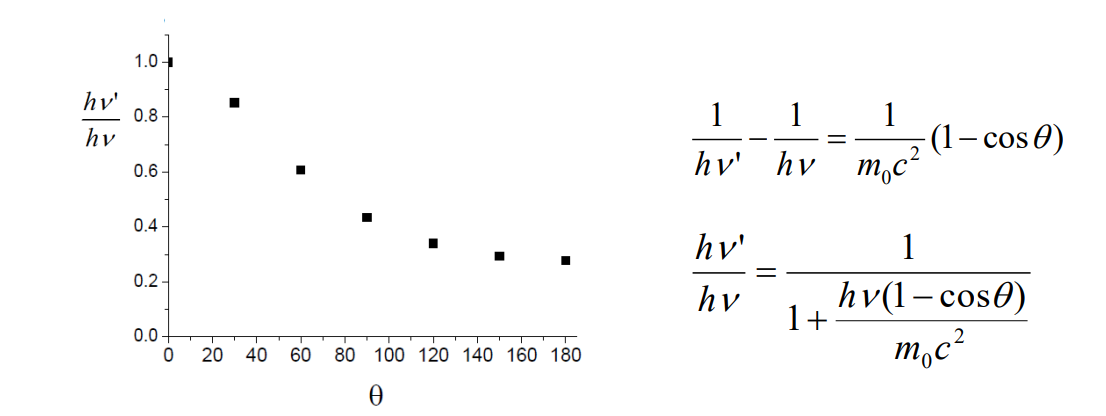

In [72]:
import uncertainties as unc
from uncertainties import unumpy as unp

In [73]:
#Crear un array de uncertainties con los valores y su error
compton = unp.uarray([cen90, cen95, cen100, cen105, cen110, cen115, cen120, cen125, cen130, cen135, cen140, cen145, cen150, cen155], [err_cen90, err_cen95, err_cen100, err_cen105, err_cen110, err_cen115, err_cen120, err_cen125, err_cen130, err_cen135, err_cen140, err_cen145, err_cen150, err_cen155])
angle = unp.uarray([90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155], [0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6 ,0.6 ,0.6 ,0.6 ,0.6])

In [74]:

# Crear un diccionario con los datos
data = {
    "angulo": angle,
    "energia": compton,
}

# Crear el DataFrame
dCompton = pd.DataFrame(data)

In [75]:
dCompton['1-cos'] = 1 - unp.cos(unp.radians(dCompton['angulo']))
dCompton['1/E'] = 1/dCompton['energia']
dCompton['1/E - 1/E0'] = dCompton['1/E'] - 1/8041.5

In [76]:
# Realizar ajuste lineal con ODR de dCompton (eje x 1-cos y en el eje y, 1/E - 1/E0)
x = unp.nominal_values(dCompton['1-cos'])
y = unp.nominal_values(dCompton['1/E - 1/E0'])
err_x = unp.std_devs(dCompton['1-cos'])
err_y = unp.std_devs(dCompton['1/E - 1/E0'])


def f(B, x):
    return B[0]*x

prop = ODR.Model(f)
data = ODR.RealData(x, y, sx=err_x, sy=err_y)
odr = ODR.ODR(data, prop, beta0=[1/511000], maxit=10000)
out = odr.run()
out.pprint()

Beta: [1.69514221e-06]
Beta Std Error: [1.27670718e-08]
Beta Covariance: [[1.47072273e-16]]
Residual Variance: 1.1082858680129097
Inverse Condition #: 1.0
Reason(s) for Halting:
  Sum of squares convergence


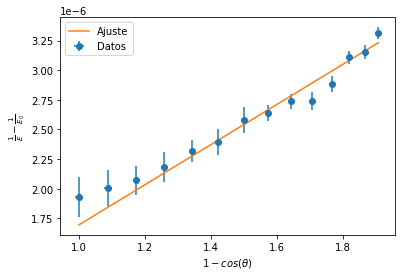

Valor de moc2: 589.9210060887565 +/- 4.443027713431542 keV
Valor esperado: 511 keV


In [77]:
# Grafico el ajuste
plt.figure()
plt.errorbar(x, y, xerr=err_x, yerr=err_y, fmt='o', label='Datos')
plt.plot(x, f(out.beta, x), label='Ajuste')
plt.xlabel(r'$1-cos(\theta)$')
plt.ylabel(r'$\frac{1}{E} - \frac{1}{E_{0}}$')
#plt.title('Compton')
plt.legend()
plt.show()

print("Valor de moc2:", 1/(out.beta[0]*1000), "+/-", (out.sd_beta[0]/out.beta[0]**2)/1000, "keV")
print("Valor esperado: 511 keV")


# En funcion de Z



## Calibracion

### Au

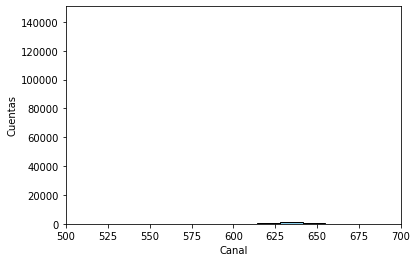

In [80]:
datosAu = pd.read_csv('Au_155.txt', sep='\t')
plt.figure()
plt.hist(datosAu['Cuentas'].index, weights=datosAu['Cuentas'], bins=150, edgecolor='black', color="skyblue")
plt.xlabel('Canal')
plt.ylabel('Cuentas')
plt.xlim(500, 700)
plt.show()

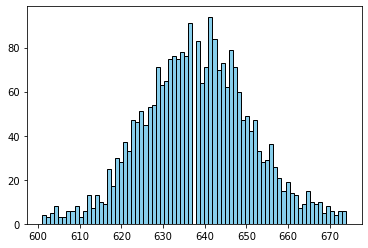

In [81]:
datosCalAu = datosAu[(datosAu['Cuentas'].index > 600) & (datosAu['Cuentas'].index < 675)]
plt.hist(datosCalAu['Cuentas'].index, weights=datosCalAu['Cuentas'], bins=675-600, edgecolor='black', color="skyblue")
plt.show()

In [82]:
x = datosCalAu['Cuentas'].index
y = datosCalAu['Cuentas']

def f(B, x):
    return B[0]*np.exp(-((x-B[1])**2)/(2*B[2]**2))

gauss = ODR.Model(f)
data = ODR.RealData(x, y)
odr = ODR.ODR(data, gauss, beta0=[100, 650, 20], maxit=10000)
out = odr.run()
out.pprint()

cenAu = out.beta[1]
err_cenAu = out.sd_beta[1]

Beta: [ 87.70818768 638.5251914   12.30368672]
Beta Std Error: [1.61036719 0.37100634 0.26408225]
Beta Covariance: [[ 0.34871492  0.00438428 -0.02140862]
 [ 0.00438428  0.01850902 -0.00041256]
 [-0.02140862 -0.00041256  0.00937776]]
Residual Variance: 7.43668351248624
Inverse Condition #: 0.03248501355872427
Reason(s) for Halting:
  Sum of squares convergence


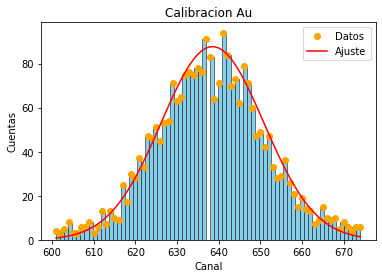

El pico Au está centrado en el canal 638.5251914028509 +/- 0.37100634344883604


In [83]:
#Grafico
plt.figure()
plt.plot(x, y, 'o', label='Datos', color="orange")
plt.hist(x, weights=y, bins=675-600, edgecolor="black", color="skyblue", linewidth=0.5)
plt.plot(x, f(out.beta, x), label='Ajuste', color="red")
plt.xlabel('Canal')
plt.ylabel('Cuentas')
plt.title('Calibracion Au')
plt.legend()
plt.show()

print("El pico Au está centrado en el canal", cenAu, "+/-", err_cenAu)

### Sb

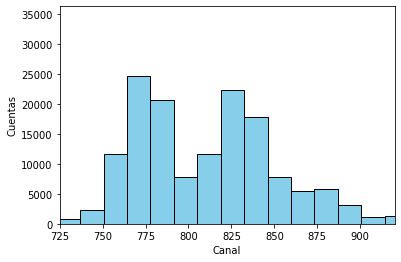

In [91]:
datosSb = pd.read_csv('Sb_155.txt', sep='\t')
plt.figure()
plt.hist(datosSb['Cuentas'].index, weights=datosSb['Cuentas'], bins=150, edgecolor='black', color="skyblue")
plt.xlabel('Canal')
plt.ylabel('Cuentas')
#poner en el eje x valores cada 20
plt.xticks(np.arange(725, 920, 25))
plt.xlim(725, 920)
plt.show()

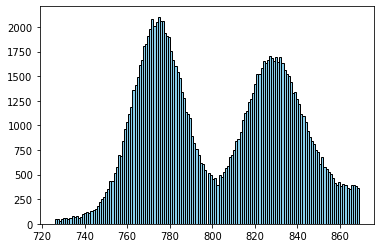

In [93]:
datosSbCal = datosSb[(datosSb['Cuentas'].index > 725) & (datosSb['Cuentas'].index < 870)]
plt.hist(datosSbCal['Cuentas'].index, weights=datosSbCal['Cuentas'], bins=870-725, edgecolor='black', color="skyblue")
plt.show()


In [100]:
x = datosSbCal['Cuentas'].index
y = datosSbCal['Cuentas']

def f(B, x):
    return B[0]*np.exp(-((x-B[1])**2)/(2*B[2]**2)) + B[3]*np.exp(-((x-B[4])**2)/(2*B[5]**2))

gauss = ODR.Model(f)
data = ODR.RealData(x, y)
odr = ODR.ODR(data, gauss, beta0=[2000, 776, 20, 1700, 825, 20], maxit=10000)
out = odr.run()
out.pprint()

cenSb = out.beta[1]
err_cenSb = out.sd_beta[1]
cenSb2 = out.beta[4]
err_cenSb2 = out.sd_beta[4]

Beta: [2102.94956883  772.42972074   12.95868129 1709.35567235  831.73401633
   15.09454908]
Beta Std Error: [12.91656743  0.44451802  0.25169016 22.14221133  0.44140283  0.34240136]
Beta Covariance: [[ 1.08603333e+01 -5.16934132e-02 -2.59330999e-02 -4.70418566e-01
  -2.57282121e-02  2.69048942e-02]
 [-5.16934132e-02  1.28625672e-02  1.97512643e-03  1.11966285e-01
   5.11934618e-03 -6.06844336e-03]
 [-2.59330999e-02  1.97512643e-03  4.12364607e-03  7.15329917e-02
   3.34972599e-03 -3.91746746e-03]
 [-4.70418566e-01  1.11966285e-01  7.15329917e-02  3.19147102e+01
   1.05045754e-01 -1.53318523e-01]
 [-2.57282121e-02  5.11934618e-03  3.34972599e-03  1.05045754e-01
   1.26829171e-02 -2.15764338e-04]
 [ 2.69048942e-02 -6.06844336e-03 -3.91746746e-03 -1.53318523e-01
  -2.15764338e-04  7.63167511e-03]]
Residual Variance: 15.362117330847923
Inverse Condition #: 0.0061330752864013575
Reason(s) for Halting:
  Sum of squares convergence


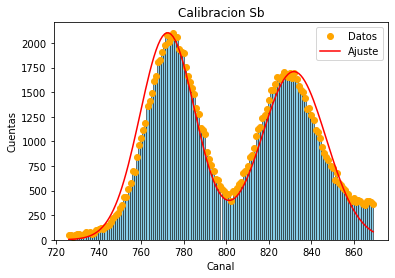

El pico Sb está centrado en el canal 772.4297207377444 +/- 0.4445180156907371
El pico Sb2 está centrado en el canal 831.7340163268723 +/- 0.44140283193612495


In [101]:
#Grafico 
plt.figure()
plt.plot(x, y, 'o', label='Datos', color="orange")
plt.hist(x, weights=y, bins=870-725, edgecolor="black", color="skyblue", linewidth=0.5)
plt.plot(x, f(out.beta, x), label='Ajuste', color="red")
plt.xlabel('Canal')
plt.ylabel('Cuentas')
plt.title('Calibracion Sb')
plt.legend()
plt.show()

print("El pico Sb está centrado en el canal", cenSb, "+/-", err_cenSb)
print("El pico Sb2 está centrado en el canal", cenSb2, "+/-", err_cenSb2)

### Ti

<function matplotlib.pyplot.show(close=None, block=None)>

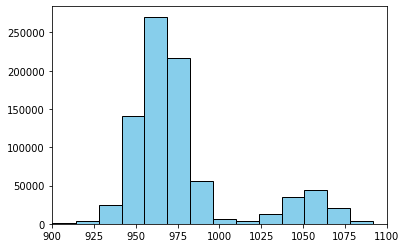

In [104]:
datosTi = pd.read_csv('Ti_155.txt', sep='\t')
plt.figure()
plt.hist(datosTi['Cuentas'].index, weights=datosTi['Cuentas'], bins=150, edgecolor='black', color="skyblue")
plt.xlim(900,1100)
plt.show

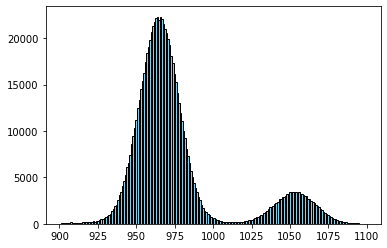

In [105]:
datosCalTi = datosTi[(datosTi['Cuentas'].index > 900) & (datosTi['Cuentas'].index < 1100)]
plt.hist(datosCalTi['Cuentas'].index, weights=datosCalTi['Cuentas'], bins=1100-900, edgecolor='black', color="skyblue")
plt.show()

In [107]:
x = datosCalTi['Cuentas'].index
y = datosCalTi['Cuentas']

def f(B, x):
    return B[0]*np.exp(-((x-B[1])**2)/(2*B[2]**2)) + B[3]*np.exp(-((x-B[4])**2)/(2*B[5]**2))

gauss = ODR.Model(f)
data = ODR.RealData(x, y)
odr = ODR.ODR(data, gauss, beta0=[20000, 965, 20, 3500, 1050, 20], maxit=10000)
out = odr.run()
out.pprint()

cenTi = out.beta[1]
err_cenTi = out.sd_beta[1]
cenTi2 = out.beta[4]
err_cenTi2 = out.sd_beta[4]

Beta: [2.23045390e+04 9.63694678e+02 1.47153010e+01 3.45177239e+03
 1.05284561e+03 1.38503826e+01]
Beta Std Error: [74.8608874   0.31089459  0.13119271 15.0142819   0.38044981  0.21433882]
Beta Covariance: [[ 4.80402484e+02 -2.72111485e-01 -6.38004486e-02 -5.78220933e-02
  -3.09761486e-02  2.45839258e-02]
 [-2.72111485e-01  8.28555574e-03  2.34150103e-04  1.38725256e-03
   7.29253609e-04 -5.81119230e-04]
 [-6.38004486e-02  2.34150103e-04  1.47541670e-03  7.56826215e-04
   4.07622787e-04 -3.23146534e-04]
 [-5.78220933e-02  1.38725256e-03  7.56826215e-04  1.93243295e+01
  -1.15796751e-02 -2.32323411e-02]
 [-3.09761486e-02  7.29253609e-04  4.07622787e-04 -1.15796751e-02
   1.24076647e-02 -1.28723513e-03]
 [ 2.45839258e-02 -5.81119230e-04 -3.23146534e-04 -2.32323411e-02
  -1.28723513e-03  3.93819294e-03]]
Residual Variance: 11.665535989237526
Inverse Condition #: 0.038789061675089595
Reason(s) for Halting:
  Sum of squares convergence


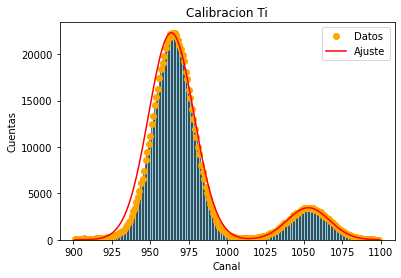

El pico Ti está centrado en el canal 963.6946778570203 +/- 0.3108945940930194
El pico Ti2 está centrado en el canal 1052.8456116389855 +/- 0.3804498109157297


In [108]:
#Grafico
plt.figure()
plt.plot(x, y, 'o', label='Datos', color="orange")
plt.hist(x, weights=y, bins=1100-900, edgecolor="black", color="skyblue", linewidth=0.5)
plt.plot(x, f(out.beta, x), label='Ajuste', color="red")
plt.xlabel('Canal')
plt.ylabel('Cuentas')
plt.title('Calibracion Ti')
plt.legend()
plt.show()

print("El pico Ti está centrado en el canal", cenTi, "+/-", err_cenTi)
print("El pico Ti2 está centrado en el canal", cenTi2, "+/-", err_cenTi2)

### Zr

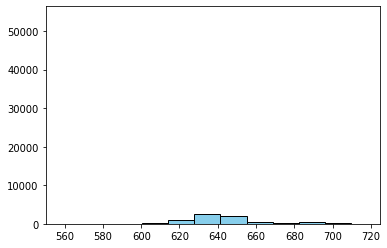

In [111]:
datosZr = pd.read_csv('Zr_155.txt', sep='\t')
plt.figure()
plt.hist(datosZr['Cuentas'].index, weights=datosZr['Cuentas'], bins=150, edgecolor='black', color="skyblue")
plt.xlim(550, 725)
plt.show()

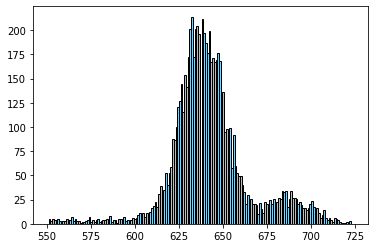

In [112]:
datosCalZr = datosZr[(datosZr['Cuentas'].index > 550) & (datosZr['Cuentas'].index < 725)]
plt.hist(datosCalZr['Cuentas'].index, weights=datosCalZr['Cuentas'], bins=725-550, edgecolor='black', color="skyblue")
plt.show()

In [114]:
x = datosCalZr['Cuentas'].index
y = datosCalZr['Cuentas']

def f(B, x):
    return B[0]*np.exp(-((x-B[1])**2)/(2*B[2]**2)) + B[3]*np.exp(-((x-B[4])**2)/(2*B[5]**2))

gauss = ODR.Model(f)
data = ODR.RealData(x, y)
odr = ODR.ODR(data, gauss, beta0=[200, 630, 20, 30, 680, 20], maxit=10000)
out = odr.run()
out.pprint()

cenZr = out.beta[1]
err_cenZr = out.sd_beta[1]
cenZr2 = out.beta[4]
err_cenZr2 = out.sd_beta[4]

Beta: [211.46839358 637.79436868  12.10623499  30.75914695 687.31484269
  11.19049779]
Beta Std Error: [2.4397586  0.38509783 0.24057045 1.22104617 0.58972433 0.59365232]
Beta Covariance: [[ 0.62244938  0.00457515 -0.0129869  -0.00089266 -0.00478565  0.00455202]
 [ 0.00457515  0.01550788  0.00080641  0.0034478   0.00538235 -0.00634895]
 [-0.0129869   0.00080641  0.00605194  0.00255711  0.00500132 -0.00558433]
 [-0.00089266  0.0034478   0.00255711  0.15591019  0.00556776 -0.04098683]
 [-0.00478565  0.00538235  0.00500132  0.00556776  0.03636708 -0.00719738]
 [ 0.00455202 -0.00634895 -0.00558433 -0.04098683 -0.00719738  0.03685315]]
Residual Variance: 9.562901371759015
Inverse Condition #: 0.014366490136900178
Reason(s) for Halting:
  Sum of squares convergence


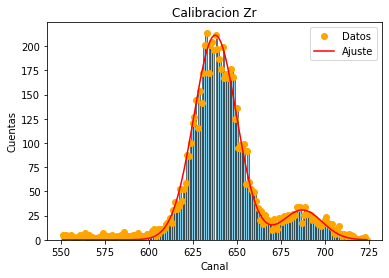

El pico Zr está centrado en el canal 637.794368675841 +/- 0.3850978288101716
El pico Zr2 está centrado en el canal 687.3148426892728 +/- 0.5897243261702074


In [115]:
#Grafico 
plt.figure()
plt.plot(x, y, 'o', label='Datos', color="orange")
plt.hist(x, weights=y, bins=725-550, edgecolor="black", color="skyblue", linewidth=0.5)
plt.plot(x, f(out.beta, x), label='Ajuste', color="red")
plt.xlabel('Canal')
plt.ylabel('Cuentas')
plt.title('Calibracion Zr')
plt.legend()
plt.show()

print("El pico Zr está centrado en el canal", cenZr, "+/-", err_cenZr)
print("El pico Zr2 está centrado en el canal", cenZr2, "+/-", err_cenZr2)

### Resumen

In [116]:
print("Elemento \t Canal \t\t Error")
print("Au \t\t", cenAu, "\t", err_cenAu)
print("Sb \t\t", cenSb, "\t", err_cenSb)
print("Sb2 \t\t", cenSb2, "\t", err_cenSb2)
print("Ti \t\t", cenTi, "\t", err_cenTi)
print("Ti2 \t\t", cenTi2, "\t", err_cenTi2)
print("Zr \t\t", cenZr, "\t", err_cenZr)
print("Zr2 \t\t", cenZr2, "\t", err_cenZr2)


Elemento 	 Canal 		 Error
Au 		 638.5251914028509 	 0.37100634344883604
Sb 		 772.4297207377444 	 0.4445180156907371
Sb2 		 831.7340163268723 	 0.44140283193612495
Ti 		 963.6946778570203 	 0.3108945940930194
Ti2 		 1052.8456116389855 	 0.3804498109157297
Zr 		 637.794368675841 	 0.3850978288101716
Zr2 		 687.3148426892728 	 0.5897243261702074


In [120]:
diccCal = {
    "Elemento": ["Au", "Sb", "Sb", "Ti", "Ti", "Zr", "Zr"],
    "Canal": [cenAu, cenSb, cenSb2, cenTi, cenTi2, cenZr, cenZr2],
    "Error": [err_cenAu, err_cenSb, err_cenSb2, err_cenTi, err_cenTi2, err_cenZr, err_cenZr2],
    "Energia": [2957.7, 3604.72, 3843.57, 4510.84, 4931.81, 2957.7, 3190.5]
}

# Armar un dataframe con dicc Cal
dCal = pd.DataFrame(diccCal)
#Ajustar una recta con ODR
def f(B, x):
    return B[0]*x + B[1]

lineal = ODR.Model(f)
data = ODR.RealData(dCal['Canal'], dCal['Energia'], sx=dCal['Error'])
odr = ODR.ODR(data, lineal, beta0=[1, 0], maxit=10000)
out = odr.run()
out.pprint()

m2 = out.beta[0]
b2 = out.beta[1]

print("La pendiente es:", out.beta[0], "+/-", out.sd_beta[0])
print("El corte es:", out.beta[1], "+/-", out.sd_beta[1])


Beta: [  4.7618344  -84.17273254]
Beta Std Error: [ 0.03589885 29.78788116]
Beta Covariance: [[ 2.69625240e-05 -2.19669066e-02]
 [-2.19669066e-02  1.85643068e+01]]
Residual Variance: 47.79698329283232
Inverse Condition #: 2.2848765696437928e-05
Reason(s) for Halting:
  Sum of squares convergence
La pendiente es: 4.761834403129091 +/- 0.035898848313388826
El corte es: -84.17273254222098 +/- 29.787881161023414


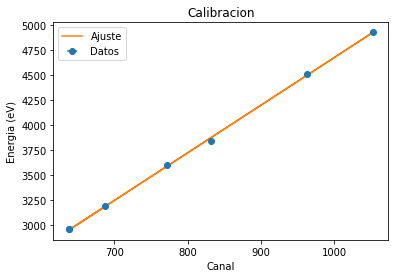

In [118]:
#Grafico 
plt.figure()
plt.errorbar(dCal['Canal'], dCal['Energia'], xerr=dCal['Error'], fmt='o', label='Datos')
plt.plot(dCal['Canal'], f(out.beta, dCal['Canal']), label='Ajuste')
plt.xlabel('Canal')
plt.ylabel('Energia (eV)')
plt.title('Calibracion')
plt.legend()
plt.show()

In [121]:
def to_energia2(canal):
    return m2*canal + b2


## Au

In [126]:
datosAu = pd.read_csv('Au_155.txt', sep='\t')
datosAu['Energia'] = to_energia2(datosAu['Cuentas'].index)



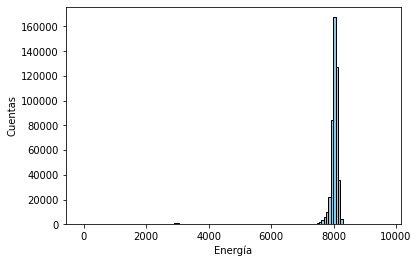

In [127]:
plt.hist(datosAu['Energia'], weights=datosAu['Cuentas'], bins=128, color='skyblue', edgecolor='black', density=False)
plt.xlabel('Energía')
plt.ylabel('Cuentas')
plt.show()

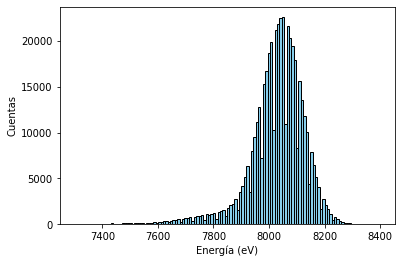

In [128]:
dAu = datosAu[(datosAu['Energia'] > 7300) & (datosAu['Energia'] < 8400)]
plt.hist(dAu['Energia'], weights=dAu['Cuentas'], bins=128, color='skyblue', edgecolor='black', density=False)
plt.xlabel('Energía (eV)')
plt.ylabel('Cuentas')
plt.show()

In [129]:
x = dAu['Energia']
y = dAu['Cuentas']

def f(B, x):
    return B[0]*np.exp(-((x-B[1])**2)/(2*B[2]**2)) + B[3]*np.exp(-((x-8041)**2)/(2*B[4]**2))

gauss = ODR.Model(f)
data = ODR.RealData(x, y)
odr = ODR.ODR(data, gauss, beta0=[8000, 8000, 40, 12000, 60], maxit=10000)
out = odr.run()
out.pprint()

cenAu = out.beta[1]
err_cenAu = out.sd_beta[1]
print('Centro del pico C: ', cenAu, "+/-", err_cenAu)

Beta: [  577.40951498  7877.76163658   170.5640162  10973.41248923
    72.28243104]
Beta Std Error: [18.93456966  6.763392    2.61244354 49.66199666  0.89447642]
Beta Covariance: [[ 2.01778921e+00  5.92784032e-01  9.08308306e-02 -2.47632235e+00
  -5.70204979e-02]
 [ 5.92784032e-01  2.57450676e-01  7.19627037e-02 -9.81091674e-01
  -1.89117276e-02]
 [ 9.08308306e-02  7.19627037e-02  3.84112770e-02 -2.65841350e-01
  -4.41481935e-03]
 [-2.47632235e+00 -9.81091674e-01 -2.65841350e-01  1.38807608e+01
   6.00499277e-02]
 [-5.70204979e-02 -1.89117276e-02 -4.41481935e-03  6.00499277e-02
   4.50300792e-03]]
Residual Variance: 177.67858308354027
Inverse Condition #: 0.00434468241195874
Reason(s) for Halting:
  Sum of squares convergence
Centro del pico C:  7877.761636581278 +/- 6.763391997292246


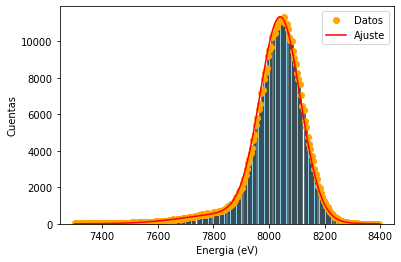

El pico C está centrado en la energia 7877.761636581278 +/- 6.763391997292246 eV


In [130]:
#Grafico el ajuste
plt.figure()
plt.plot(x, y, 'o', label='Datos', color="orange")
plt.hist(x, weights=y, bins=250, edgecolor="black", color="skyblue", linewidth=0.5, density=False)
plt.plot(x, f(out.beta, x), label='Ajuste', color="red")
plt.xlabel('Energia (eV)')
plt.ylabel('Cuentas')
#plt.title('Compton 90°')
plt.legend()
plt.show()

print("El pico C está centrado en la energia", cenAu, "+/-", err_cenAu, "eV")

## Sb

In [131]:
datosSb = pd.read_csv('Sb_155.txt', sep='\t')
datosSb['Energia'] = to_energia2(datosSb['Cuentas'].index)

In [132]:
dSb = datosSb[(datosSb['Energia'] > 7300) & (datosSb['Energia'] < 8400)]

In [133]:
x = dSb['Energia']
y = dSb['Cuentas']

gauss = ODR.Model(f)
data = ODR.RealData(x, y)
odr = ODR.ODR(data, gauss, beta0=[2000, 7700, 100, 1900, 60], maxit=10000)
out = odr.run()
out.pprint()

cenSb = out.beta[1]
err_cenSb = out.sd_beta[1]
print('Centro del pico C: ', cenSb, "+/-", err_cenSb)

Beta: [ 699.9042588  7881.32600607  157.60397063 2484.58665947   70.74019949]
Beta Std Error: [18.23263458  5.59640692  2.21996171 32.39845387  1.5304887 ]
Beta Covariance: [[ 1.5314351   0.38172851  0.06909122 -2.02757102 -0.09237326]
 [ 0.38172851  0.14428405  0.04148278 -0.69672416 -0.02655301]
 [ 0.06909122  0.04148278  0.02270339 -0.20386929 -0.00686876]
 [-2.02757102 -0.69672416 -0.20386929  4.83557709  0.12215445]
 [-0.09237326 -0.02655301 -0.00686876  0.12215445  0.01079096]]
Residual Variance: 217.0702261072683
Inverse Condition #: 0.006805860707161935
Reason(s) for Halting:
  Sum of squares convergence
Centro del pico C:  7881.326006068703 +/- 5.596406924212672


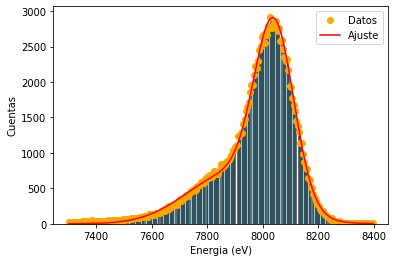

El pico C está centrado en la energia 7881.326006068703 +/- 5.596406924212672 eV


In [134]:
#Grafico el ajuste
plt.figure()
plt.plot(x, y, 'o', label='Datos', color="orange")
plt.hist(x, weights=y, bins=250, edgecolor="black", color="skyblue", linewidth=0.5, density=False)
plt.plot(x, f(out.beta, x), label='Ajuste', color="red")
plt.xlabel('Energia (eV)')
plt.ylabel('Cuentas')
#plt.title('Compton 90°')
plt.legend()
plt.show()

print("El pico C está centrado en la energia", cenSb, "+/-", err_cenSb, "eV")

## Ti

In [135]:
datosTi = pd.read_csv('Ti_155.txt', sep='\t')
datosTi['Energia'] = to_energia2(datosTi['Cuentas'].index)
dTi = datosTi[(datosTi['Energia'] > 7300) & (datosTi['Energia'] < 8400)]

In [136]:
x = dTi['Energia']
y = dTi['Cuentas']

gauss = ODR.Model(f)
data = ODR.RealData(x, y)
odr = ODR.ODR(data, gauss, beta0=[2000, 7900, 80, 1900, 60], maxit=10000)
out = odr.run()
out.pprint()

cenTi = out.beta[1]
err_cenTi = out.sd_beta[1]
print('Centro del pico C: ', cenTi, "+/-", err_cenTi)

Beta: [2592.9685783  7851.41703173  163.62753246 4044.96267265   65.82831608]
Beta Std Error: [48.79708509  5.99124852  2.62529597 98.04025329  3.46911264]
Beta Covariance: [[ 1.56100601e+00  1.05938537e-01  1.41526141e-02 -1.87363562e+00
  -7.70756019e-02]
 [ 1.05938537e-01  2.35316016e-02  6.32708791e-03 -3.37173593e-01
  -7.59520977e-03]
 [ 1.41526141e-02  6.32708791e-03  4.51828228e-03 -1.13106265e-01
  -1.79562288e-03]
 [-1.87363562e+00 -3.37173593e-01 -1.13106265e-01  6.30123484e+00
   1.15155957e-01]
 [-7.70756019e-02 -7.59520977e-03 -1.79562288e-03  1.15155957e-01
   7.88957518e-03]]
Residual Variance: 1525.3980386735427
Inverse Condition #: 0.0048835748918336095
Reason(s) for Halting:
  Sum of squares convergence
Centro del pico C:  7851.41703173325 +/- 5.991248522729074


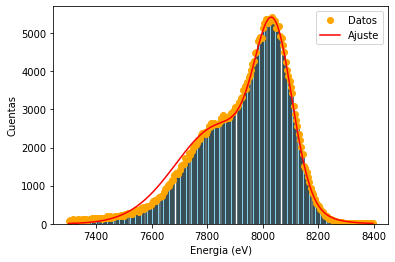

El pico C está centrado en la energia 7851.41703173325 +/- 5.991248522729074 eV


In [137]:
#Grafico el ajuste
plt.figure()
plt.plot(x, y, 'o', label='Datos', color="orange")
plt.hist(x, weights=y, bins=250, edgecolor="black", color="skyblue", linewidth=0.5, density=False)
plt.plot(x, f(out.beta, x), label='Ajuste', color="red")
plt.xlabel('Energia (eV)')
plt.ylabel('Cuentas')
plt.legend()
plt.show()

print("El pico C está centrado en la energia", cenTi, "+/-", err_cenTi, "eV")

## Zr

In [138]:
datosZr = pd.read_csv('Zr_155.txt', sep='\t')
datosZr['Energia'] = to_energia2(datosZr['Cuentas'].index)
dZr = datosZr[(datosZr['Energia'] > 7300) & (datosZr['Energia'] < 8400)]


In [139]:
x = dZr['Energia']
y = dZr['Cuentas']

gauss = ODR.Model(f)
data = ODR.RealData(x, y)
odr = ODR.ODR(data, gauss, beta0=[2000, 7900, 80, 1900, 60], maxit=10000)
out = odr.run()
out.pprint()

cenZr = out.beta[1]
err_cenZr = out.sd_beta[1]
print('Centro del pico C: ', cenZr, "+/-", err_cenZr)

Beta: [1512.20712733 7865.1677596   167.97357477 3518.17283124   68.80011822]
Beta Std Error: [33.50513587  5.09856562  2.12216058 56.1096874   2.45333902]
Beta Covariance: [[ 1.64835755e+00  1.69060560e-01  1.37496198e-02 -1.89006695e+00
  -8.21090676e-02]
 [ 1.69060560e-01  3.81702217e-02  8.99435140e-03 -3.47763114e-01
  -1.04464960e-02]
 [ 1.37496198e-02  8.99435140e-03  6.61279622e-03 -9.16184806e-02
  -1.94763393e-03]
 [-1.89006695e+00 -3.47763114e-01 -9.16184806e-02  4.62279201e+00
   1.01007542e-01]
 [-8.21090676e-02 -1.04464960e-02 -1.94763393e-03  1.01007542e-01
   8.83779222e-03]]
Residual Variance: 681.0379989135004
Inverse Condition #: 0.006034377366847418
Reason(s) for Halting:
  Sum of squares convergence
Centro del pico C:  7865.167759596722 +/- 5.098565624180016


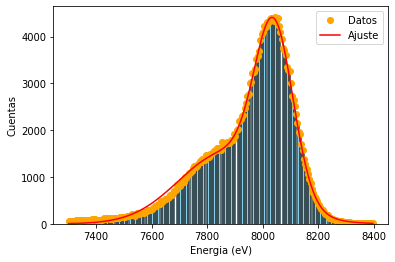

El pico C está centrado en la energia 7865.167759596722 +/- 5.098565624180016 eV


In [140]:
#Grafico
plt.figure()
plt.plot(x, y, 'o', label='Datos', color="orange")
plt.hist(x, weights=y, bins=250, edgecolor="black", color="skyblue", linewidth=0.5, density=False)
plt.plot(x, f(out.beta, x), label='Ajuste', color="red")
plt.xlabel('Energia (eV)')
plt.ylabel('Cuentas')
plt.legend()
plt.show()

print("El pico C está centrado en la energia", cenZr, "+/-", err_cenZr, "eV")

## Resumen

In [141]:
print("Elemento: \t Energia (eV) \t\t Error")
print("Sb (51) \t", cenSb, "\t", err_cenSb)
print("Au (79) \t", cenAu, "\t", err_cenAu)
print("Zr (40) \t", cenZr, "\t", err_cenZr)
print("Ti (22) \t", cenTi, "\t", err_cenTi)


Elemento: 	 Energia (eV) 		 Error
Sb (51) 	 7881.326006068703 	 5.596406924212672
Au (79) 	 7877.761636581278 	 6.763391997292246
Zr (40) 	 7865.167759596722 	 5.098565624180016
Ti (22) 	 7851.41703173325 	 5.991248522729074
